# Assessment Background/Scenario

You are working as an AI engineer at a reputable organisation. You have a client from the
telecommunication sector who is facing a customer churn problem due to fierce competition in
the market. Customer churn, also known as ‘customer attrition’, is defined as the rate at which
customers stop using an organisation’s services within a certain timeframe. Your client is
interested in applying AI techniques to explore and model its customer data. This modelling can
help the company to forecast their customers’ behaviour and potentially help reduce the churn
rate.

In [ ]:
#Pandas Library is used for Data Manipulation and Analysis
import pandas as pd
#Numpy Library Hekps us to create Multidimensional Arrays
import numpy as np
# Seaborn Library is used for the Data Visualization and to create heat maps
import seaborn as sns
# Matplotlib library is used for the data visualization
import matplotlib.pyplot as plt
#folium library is used for the visualization of geospatial data
import folium
from folium.plugins import HeatMap
plt.ticklabel_format(useOffset=False)
%matplotlib inline
#Import math heps us to use Mathematical Functions
import math
#To split the dataset into the training and test set we import the Train and Test Split library
from sklearn.model_selection import train_test_split
# Decision Tree Classifier is the Machine Learning Model 
from sklearn.tree import DecisionTreeClassifier
# Using SVM we are importing the Support Vector Machine Classifier
from sklearn import svm
from sklearn.svm import SVC
# Standard Scaler scales each feature to unit variance
from sklearn.preprocessing import StandardScaler
# Accuracy Score
from sklearn.metrics import accuracy_score
# Classification Report shows us the recall score, percision and accuracy score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, f1_score
# Grid Search CV and Randomized Search CV are used for Hyper Prarmeter Tuning an Machine Learning Mode
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
# To create an Percision Curve
from sklearn.metrics import precision_recall_curve

In [ ]:
# For the Visualization Purpose
from matplotlib import pyplot

In [ ]:
# To print and plot the confusion matric, recall score, percision score and accuracy score separately
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score,make_scorer

Load the Dataset

In [ ]:
# As our dataset is in the form of a csv we are using read_csv
data = pd.read_csv("cell2celltrain_Small_6k.csv")

In [ ]:
#Using data.head(5), we are printing the first five rows
data.head(5)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436,30,0.25,1,0,-112,0.1,11.0,0.3,...,8,No,0,150,No,2-High,Other,Other,Yes,Yes
1,44.83,172,45,0,0,0,-12,-15.5,0.3,0.3,...,7,No,0,80,No,2-High,Suburban,Other,No,No
2,42.63,838,50,0.74,5,0,28,-2.6,4.7,6.3,...,0,No,0,130,No,5-Low,Suburban,Other,?,No
3,33.49,358,50,0,0,0,-16,0,1.0,4.0,...,8,No,0,150,No,2-High,Town,Other,Yes,No
4,60.94,1276,60,4.7,0,0,-188,0.2,5.7,19.7,...,0,No,0,30,No,5-Low,Other,Other,?,No


In [ ]:
# Using data.shape we are printing the number of attributes and number of features we have in our data set
data.shape

(6380, 57)

In [ ]:
# Using .copy(), we are copying all the data into an another variable
df= data.copy()

In [ ]:
dfv = data.copy()

# Data Pre-preocessing 

Data Preparation

In [ ]:
# The.info(), shows the data type of each variable, number of non null values along with this it prints the name of each collumn
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             6380 non-null   object 
 1   MonthlyMinutes             6380 non-null   object 
 2   TotalRecurringCharge       6380 non-null   object 
 3   DirectorAssistedCalls      6380 non-null   object 
 4   OverageMinutes             6380 non-null   object 
 5   RoamingCalls               6380 non-null   object 
 6   PercChangeMinutes          6380 non-null   object 
 7   PercChangeRevenues         6380 non-null   object 
 8   DroppedCalls               6380 non-null   float64
 9   BlockedCalls               6380 non-null   float64
 10  UnsweredCalls              6380 non-null   float64
 11  CustomerCareCalls          6380 non-null   float64
 12  ThreewayCalls              6380 non-null   float64
 13  ReceivedCalls              6380 non-null   float

In [ ]:
# Using .value_counts(), we can do the count of each unique attribute in a collumn
data["PrizmCode"].value_counts()

Other       3083
Suburban    2056
Town         959
Rural        282
Name: PrizmCode, dtype: int64

In [ ]:
data["Occupation"].value_counts()

Other         4750
Professiol    1061
Crafts         192
Clerical       112
Self           108
Retired         84
Student         47
Homemaker       26
Name: Occupation, dtype: int64

In [ ]:
# As the Machine Learning Model only accepts Numerical data so we generate dummies for the text collumn
# As prizm code collum contains text data so we are generating the dummies for it 
one_hot_encoding_columns = ["PrizmCode"]

In [ ]:
#Generating Dummies
data = pd.get_dummies(data, columns = one_hot_encoding_columns)

In [ ]:
# As the Machine Learning Model accepts only numerical data, so those columns which have binary data in those columns 
#we are replacing Yes with 1 and No with 0
data['Churn'] = data['Churn'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
# As the Machine Learning Model accepts only numerical data, so those columns which have binary data in those columns 
#we are replacing Yes with 1 and No with 0
df['Churn'] = df['Churn'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['MaritalStatus'] = data['MaritalStatus'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['MadeCallToRetentionTeam'] = data['MadeCallToRetentionTeam'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['OwnsMotorcycle'] = data['OwnsMotorcycle'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['ChildrenInHH'] = data['ChildrenInHH'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['HandsetRefurbished'] = data['HandsetRefurbished'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['HandsetWebCapable'] = data['HandsetWebCapable'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['TruckOwner'] = data['TruckOwner'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['RVOwner'] = data['RVOwner'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['BuysViaMailOrder'] = data['BuysViaMailOrder'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['RespondsToMailOffers'] = data['RespondsToMailOffers'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['OptOutMailings'] = data['OptOutMailings'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['NonUSTravel'] = data['NonUSTravel'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['OwnsComputer'] = data['OwnsComputer'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['HasCreditCard'] = data['HasCreditCard'].map(
                   {'Yes':1 ,'No':0})

In [ ]:
data['NewCellphoneUser'] = data['NewCellphoneUser'].map(
                   {'Yes':1 ,'No':0})



In [ ]:
data['NotNewCellphoneUser'] = data['NotNewCellphoneUser'].map(
                   {'Yes':1 ,'No':0})


In [ ]:
data['Homeownership'] = data['Homeownership'].map(
                   {'Known':1})



In [ ]:
# Now after generating dummies and performing the mapping now we are printing the first 5 rows  to see how our data looks now
data.head(5)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetPrice,MadeCallToRetentionTeam,CreditRating,Occupation,MaritalStatus,Churn,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,30.88,436,30,0.25,1,0,-112,0.1,11.0,0.3,...,150,0,2-High,Other,1.0,1,1,0,0,0
1,44.83,172,45,0,0,0,-12,-15.5,0.3,0.3,...,80,0,2-High,Other,0.0,0,0,0,1,0
2,42.63,838,50,0.74,5,0,28,-2.6,4.7,6.3,...,130,0,5-Low,Other,NaN,0,0,0,1,0
3,33.49,358,50,0,0,0,-16,0,1.0,4.0,...,150,0,2-High,Other,1.0,0,0,0,0,1
4,60.94,1276,60,4.7,0,0,-188,0.2,5.7,19.7,...,30,0,5-Low,Other,NaN,0,1,0,0,0


In [ ]:
# Printing the Number of missing values in each collumn
data.isnull().sum()

MonthlyRevenue                  0
MonthlyMinutes                  0
TotalRecurringCharge            0
DirectorAssistedCalls           0
OverageMinutes                  0
RoamingCalls                    0
PercChangeMinutes               0
PercChangeRevenues              0
DroppedCalls                    0
BlockedCalls                    0
UnsweredCalls                   0
CustomerCareCalls               0
ThreewayCalls                   0
ReceivedCalls                   0
OutboundCalls                   0
InboundCalls                    0
PeakCallsInOut                  0
OffPeakCallsInOut               0
DroppedBlockedCalls             0
CallForwardingCalls             0
CallWaitingCalls                0
MonthsInService                 0
UniqueSubs                      0
ActiveSubs                      0
ServiceArea                     0
Handsets                        0
HandsetModels                   0
CurrentEquipmentDays            0
AgeHH1                          0
AgeHH2        

Statistical Summary

In [ ]:
# .describe() prints the statistical summary
data.describe()

,DroppedCalls,BlockedCalls,UnsweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,MaritalStatus,Churn,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
count,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000,...,6380.000000,6380.000000,6380.000000,6380.000000,3943.000000,6380.000000,6380.000000,6380.000000,6380.000000,6380.000000
mean,6.176693,4.068072,28.705878,1.806583,0.305000,115.784545,25.636787,8.204734,91.013276,68.777335,...,4.319592,0.013793,0.055956,0.034169,0.600304,0.283856,0.483229,0.044201,0.322257,0.150313
std,9.329839,9.756478,38.140535,4.445712,1.213215,175.121024,35.402182,16.581104,106.668454,95.513818,...,3.144514,0.116640,0.339910,0.181678,0.489898,0.450903,0.499758,0.205557,0.467377,0.357406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.700000,0.000000,5.300000,0.000000,0.000000,8.500000,3.300000,0.000000,22.700000,11.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,16.300000,0.000000,0.000000,52.300000,13.700000,2.300000,62.300000,36.300000,...,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.700000,3.700000,37.300000,1.700000,0.300000,150.575000,34.300000,9.300000,121.700000,89.000000,...,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,166.300000,144.700000,663.300000,85.700000,43.000000,2692.400000,540.700000,344.700000,1591.000000,1399.300000,...,9.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Printing all the collumns we have 
data.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
  

In [ ]:
data["MonthlyRevenue"].value_counts()

29.99     136
34.99     101
30.26      59
49.99      47
10         46
         ... 
14.45       1
119.15      1
17.28       1
65.58       1
20.32       1
Name: MonthlyRevenue, Length: 4066, dtype: int64

In [ ]:
# Removing those collumns which cotain a large number of missing values
data.drop("HandsetPrice", axis=1, inplace=True)

In [ ]:
data.drop("MaritalStatus", axis=1, inplace=True)

In [ ]:
data.drop("ServiceArea", axis=1, inplace=True)

In [ ]:
data.drop("CreditRating", axis=1, inplace=True)

In [ ]:
data.drop("Occupation", axis=1, inplace=True)

In [ ]:
data.drop("Homeownership", axis=1, inplace=True)


In [ ]:
# Removing the Un-neccessary characters from data
data = data[data != "?"]

In [ ]:
data.shape

(6380, 54)

In [ ]:
# Changing the object data type to numeric
data[['MonthlyRevenue', 'MonthlyMinutes']] = data[['MonthlyRevenue', 'MonthlyMinutes']].apply(pd.to_numeric)


In [ ]:
data[['TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues']] = data[['TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues']].apply(pd.to_numeric)


In [ ]:
# After changing the object data type to numeric printing the Data Type again
data.dtypes

MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnsweredCalls                float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
Handsets                       int64
HandsetModels                  int64
CurrentEquipmentDays           int64
A

In [ ]:
data[['AgeHH1', 'AgeHH2']] = data[['AgeHH1', 'AgeHH2']].apply(pd.to_numeric)


In [ ]:
data.dtypes

MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnsweredCalls                float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
Handsets                       int64
HandsetModels                  int64
CurrentEquipmentDays           int64
A

In [ ]:
data.head(5)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,Churn,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,0,8,0,0,0,1,1,0,0,0
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,0,7,0,0,0,0,0,0,1,0
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,0,0,0,0,0,0,0,0,1,0
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,0,8,0,0,0,0,0,0,0,1
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2',
       'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner',
       'RVOwner', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'AdjustmentsToCreditRating', 'Made

# DATA NORMALIZATION

In [ ]:
# Now we are doing the Data Normalization

min_max_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', "DirectorAssistedCalls","OverageMinutes", "RoamingCalls", "PercChangeMinutes", "PercChangeRevenues", "BlockedCalls", 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', "IncomeGroup"]

for column in min_max_columns:
        min_column = data[column].min()
        max_column = data[column].max()
        data[column] = (data[column] - min_column) / (max_column - min_column)   


DATA WRANGLING

In [ ]:
# Removing all the Missing Values
data.dropna(inplace = True)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

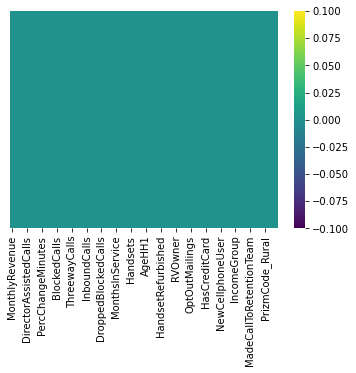

In [ ]:
# Creating an Heat Map of all the missing values
sns.heatmap(data.isnull(), yticklabels = False, cmap = "viridis")

# Data Analysis

<AxesSubplot:>

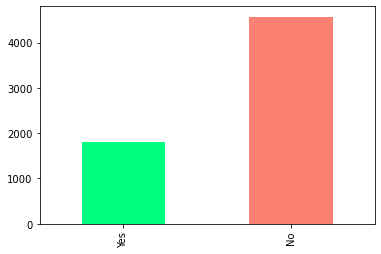

In [ ]:
# Now we are doing the Data Analysis, we are creating bar plots
dfv["Churn"].value_counts().sort_values().plot.bar(color=['springgreen','salmon'])


<AxesSubplot:>

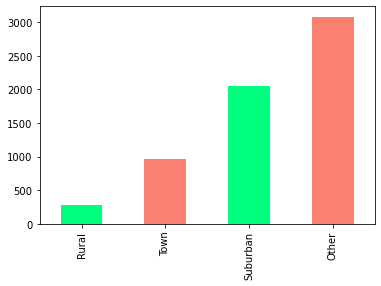

In [ ]:
# Now we are doing the Data Analysis, we are creating bar plots

df["PrizmCode"].value_counts().sort_values().plot.bar(color=['springgreen','salmon'])


(array([6.211e+03, 1.100e+01, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

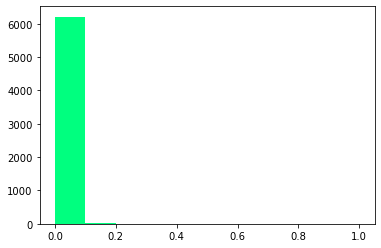

In [ ]:
plt.hist(data["DirectorAssistedCalls"], color=['springgreen'])


(array([4.725e+03, 1.108e+03, 2.860e+02, 7.900e+01, 2.300e+01, 4.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

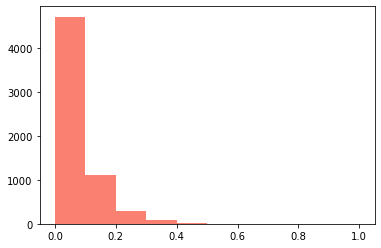

In [ ]:
plt.hist(data["MonthlyMinutes"], color=['salmon'])

<AxesSubplot:xlabel='MonthlyMinutes'>

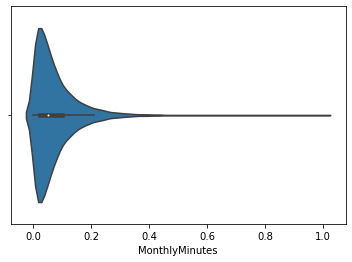

In [ ]:
# Using Seaborn we are creating an Violin Plot
sns.violinplot(x=data["MonthlyMinutes"])


<AxesSubplot:xlabel='Churn'>

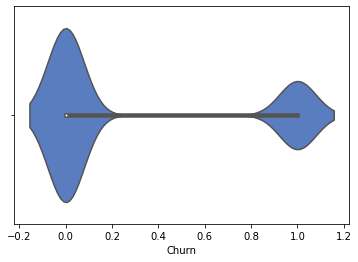

In [ ]:
sns.violinplot(x=data["Churn"], palette="muted")


<AxesSubplot:xlabel='MonthlyRevenue', ylabel='Density'>

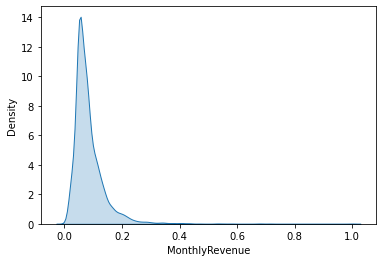

In [ ]:
 sns.kdeplot(data['MonthlyRevenue'], shade=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Professiol'),
  Text(2, 0, 'Crafts'),
  Text(3, 0, 'Retired'),
  Text(4, 0, 'Clerical'),
  Text(5, 0, 'Self'),
  Text(6, 0, 'Student'),
  Text(7, 0, 'Homemaker')])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


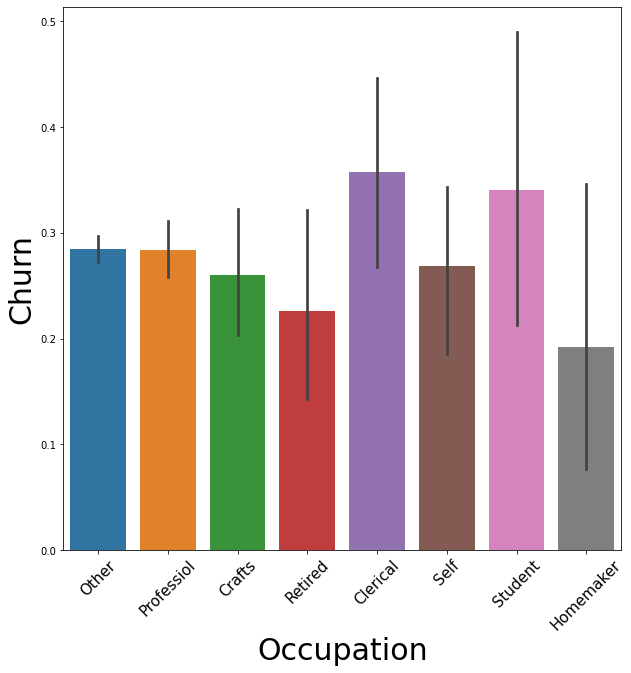

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Occupation", y = "Churn", data = df, ax = ax)
plt.ylabel("Churn", fontsize = 30)
plt.xlabel("Occupation", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Suburban'),
  Text(2, 0, 'Town'),
  Text(3, 0, 'Rural')])

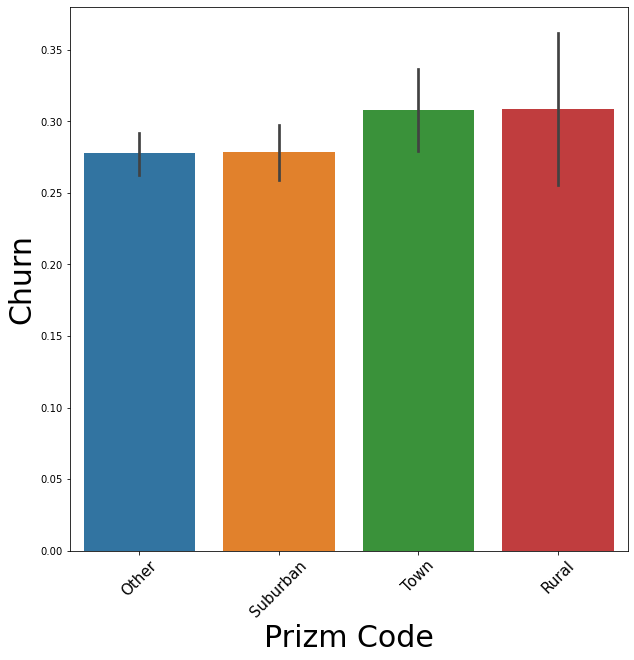

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "PrizmCode", y = "Churn", data = df, ax = ax)
plt.ylabel("Churn", fontsize = 30)
plt.xlabel("Prizm Code", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

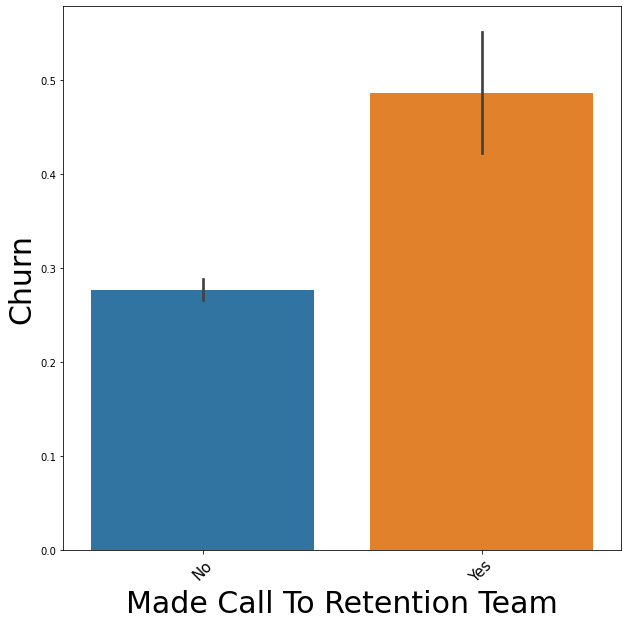

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "MadeCallToRetentionTeam", y = "Churn", data = df, ax = ax)
plt.ylabel("Churn", fontsize = 30)
plt.xlabel("Made Call To Retention Team", fontsize = 30)
plt.xticks(rotation = 45, fontsize = 15)


In [ ]:
data.head(5)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,Churn,PrizmCode_Other,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town
0,0.047352,0.059247,0.088670,0.001568,0.000439,0.0,0.483114,0.427136,11.0,0.002073,...,0,0.888889,0,0,0,1,1,0,0,0
1,0.065181,0.023373,0.125616,0.000000,0.000000,0.0,0.503707,0.415075,0.3,0.002073,...,0,0.777778,0,0,0,0,0,0,1,0
2,0.062369,0.113874,0.137931,0.004643,0.002195,0.0,0.511944,0.425048,4.7,0.043538,...,0,0.000000,0,0,0,0,0,0,1,0
3,0.050688,0.048648,0.137931,0.000000,0.000000,0.0,0.502883,0.427058,1.0,0.027643,...,0,0.888889,0,0,0,0,0,0,0,1
4,0.085770,0.173393,0.162562,0.029487,0.000000,0.0,0.467463,0.427213,5.7,0.136144,...,0,0.000000,0,0,0,0,1,0,0,0


# Train Test & Split

In [ ]:
# Separating the Independent attribute from the Dependent Attribute
X = data.drop("Churn", axis =1)
y = data["Churn"]

In [ ]:
# Here we are doing the Train and Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
X_train.shape

(4671, 53)

In [ ]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

X_train.fillna(0, inplace=True)

X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

X_test.fillna(0, inplace=True)

In [ ]:
X_train.shape

(4671, 53)

In [ ]:
X_train.dtypes

MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnsweredCalls                float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService              float64
UniqueSubs                   float64
ActiveSubs                   float64
Handsets                     float64
HandsetModels                float64
CurrentEquipmentDays         float64
A

# Decision Tree Classifier

In [ ]:
# Implementing the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
#Training the model on the Training data set
decision_tree.fit(X_train, y_train)
# Doing the Prediction
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
# Printing the Classification Report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 61.72
              precision    recall  f1-score   support

           0   0.736554  0.724664  0.730561      1115
           1   0.332609  0.346154  0.339246       442

    accuracy                       0.617213      1557
   macro avg   0.534581  0.535409  0.534903      1557
weighted avg   0.621882  0.617213  0.619475      1557



Predicted,0,1,All
Actual,,,
0,808,307,1115
1,289,153,442
All,1097,460,1557


Hyper-parameter Tuning of Decision Tree Classifier

In [ ]:
# Doing the Hyper parameter Tuning of the Decision Tree Classifier
params = {
    'max_depth': [0.1, 1, 2, 3, 5, 10, 20, 25, 30],
    'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100, 120, 150],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Implementing the Grid Search CV
grid_search = GridSearchCV(estimator=decision_tree, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 162 candidates, totalling 648 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0.1, 1, 2, 3, 5, 10, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100, 120,
                                              150]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=0.1)

In [ ]:
# Retraining the Model on the best parameters
decision_tree = DecisionTreeClassifier(max_depth=0.1)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 71.61
              precision    recall  f1-score   support

           0   0.716121  1.000000  0.834581      1115
           1   0.000000  0.000000  0.000000       442

    accuracy                       0.716121      1557
   macro avg   0.358060  0.500000  0.417290      1557
weighted avg   0.512829  0.716121  0.597661      1557



C:\Users\92303\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\92303\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\92303\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,0,All
Actual,,
0,1115,1115
1,442,442
All,1557,1557


In [ ]:
print('\nAccuracy score \n')
print(accuracy_score(y_test,Y_pred))


Accuracy score 

0.7161207450224791


<AxesSubplot:>

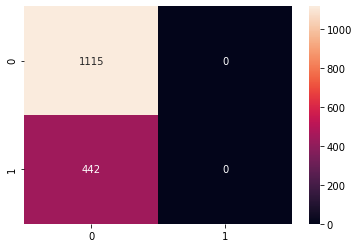

In [ ]:
# confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


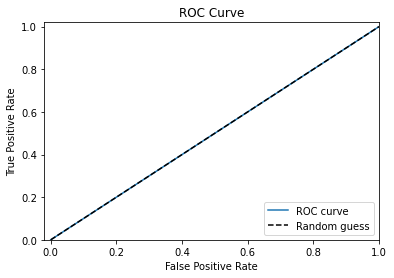

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,Y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# Support Vector Machine Classifier

In [ ]:
# Implementing the Support Vector Machine Classifier
clf = SVC()


In [ ]:
# Training the Support Vector Machine Clasifier
clf.fit(X_train, y_train)

SVC()

In [ ]:
# Doing the Prediction on the Test data set
Y_pred = clf.predict(X_test)

In [ ]:
# Printing the Classification Report
acc_decision_svm = round(clf.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_svm)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 71.61
              precision    recall  f1-score   support

           0   0.716121  1.000000  0.834581      1115
           1   0.000000  0.000000  0.000000       442

    accuracy                       0.716121      1557
   macro avg   0.358060  0.500000  0.417290      1557
weighted avg   0.512829  0.716121  0.597661      1557



C:\Users\92303\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\92303\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\92303\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,0,All
Actual,,
0,1115,1115
1,442,442
All,1557,1557


HYPER-PARAMETER TUNING USING SVM

In [ ]:
# Doing Hyper parameter Tuning Using SVM
param_grid = {'C':[0.01, 0.0001], 'degree':[0.5, 1]}


In [ ]:
# Using Grid Search CV for the Hyper Parameter Tuning
grid = GridSearchCV(SVC(probability=True),param_grid)


In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.0001], 'degree': [0.5, 1]})

In [ ]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 0.01, 'degree': 0.5}
0.7161207450224791


In [ ]:
Y_pred = grid.predict(X_test)

In [ ]:
acc_decision_svm = round(grid.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_svm)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 71.61
              precision    recall  f1-score   support

           0   0.716121  1.000000  0.834581      1115
           1   0.000000  0.000000  0.000000       442

    accuracy                       0.716121      1557
   macro avg   0.358060  0.500000  0.417290      1557
weighted avg   0.512829  0.716121  0.597661      1557



C:\Users\92303\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\92303\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\92303\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Predicted,0,All
Actual,,
0,1115,1115
1,442,442
All,1557,1557


<AxesSubplot:>

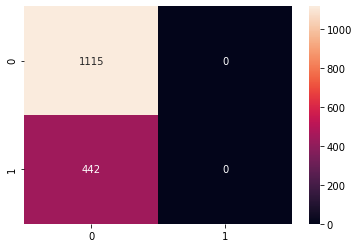

In [ ]:
# Printing the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

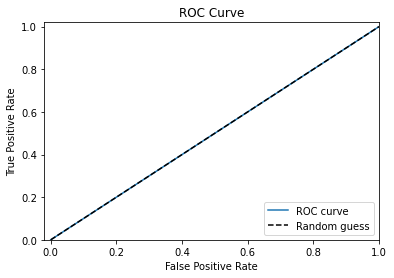

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,Y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# Naive Bayes Classifier 

In [ ]:
# Implementing the Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Training the Naive Bayes Classifier
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
Y_pred = gnb.predict(X_test)
Y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
Y_pred = gnb.predict(X_test)
acc_decision_nb = round(gnb.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_nb)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 38.02
              precision    recall  f1-score   support

           0   0.756849  0.198206  0.314144      1115
           1   0.293281  0.839367  0.434681       442

    accuracy                       0.380218      1557
   macro avg   0.525065  0.518786  0.374412      1557
weighted avg   0.625252  0.380218  0.348362      1557



Predicted,0,1,All
Actual,,,
0,221,894,1115
1,71,371,442
All,292,1265,1557


Doing Hyper-Parameter Tuning of Naive Bayes Classifier

In [ ]:
# Doing the Hyper Parameter Tuning of the Naive Bayes Classifier
nb_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

rs_gnb = RandomizedSearchCV(GaussianNB(),
                           param_distributions=nb_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

In [ ]:
rs_gnb.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_iter=20,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5111917...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   verbose=True)

In [ ]:
print(rs_gnb.best_params_)

{'var_smoothing': 0.0023101297000831605}


In [ ]:
# Choosing the Best Parameters
model = GaussianNB(var_smoothing =  0.0023101297000831605)
model.fit(X_train, y_train);
print("Gaussian Naive Bayes",model.score(X_test, y_test))

Gaussian Naive Bayes 0.7180475272960822


In [ ]:
# Doing the Prediction on the Test Data set
Y_pred = model.predict(X_test)
acc_decision_nb = round(model.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_nb)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 71.8
              precision    recall  f1-score   support

           0   0.720627  0.990135  0.834152      1115
           1   0.560000  0.031674  0.059957       442

    accuracy                       0.718048      1557
   macro avg   0.640313  0.510904  0.447055      1557
weighted avg   0.675028  0.718048  0.614374      1557



Predicted,0,1,All
Actual,,,
0,1104,11,1115
1,428,14,442
All,1532,25,1557


# Confusion Matrix

<AxesSubplot:>

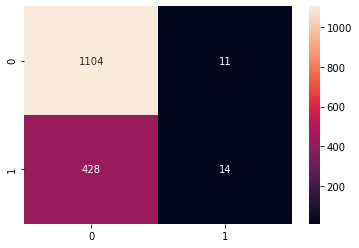

In [ ]:
# Prinitng the Confusion Matrix
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

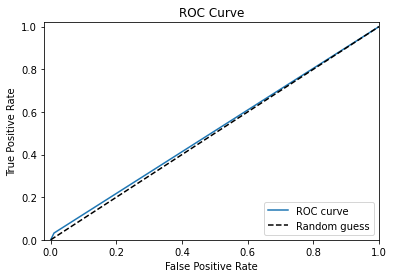

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,Y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# Artificial Neural Network

In [ ]:
# Implementing the Artificial Neural Network
model = keras.Sequential([
    keras.layers.Dense(80, input_shape = (53,), activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
    
    
    ])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs = 50)
model.evaluate(X_test, y_test)

Epoch 1/50
146/146 [==============================] - 1s 2ms/step - loss: 0.6092 - accuracy: 0.7097
Epoch 2/50
146/146 [==============================] - 0s 2ms/step - loss: 0.5908 - accuracy: 0.7187
Epoch 3/50
146/146 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7210
Epoch 4/50
146/146 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7215
Epoch 5/50
146/146 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.7210
Epoch 6/50
146/146 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7204
Epoch 7/50
146/146 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7230
Epoch 8/50
146/146 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.7249
Epoch 9/50
146/146 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.7290
Epoch 10/50
146/146 [==============================] - 0s 2ms/step - loss: 0.5584 - accuracy: 0.7296

[1.286125659942627, 0.6640976071357727]

In [ ]:
yp = model.predict(X_test)
print(yp[:5])
Y_pred = []
for element in yp:
    if element > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
Y_pred[:10]
print("ANN Prediction",Y_pred)

[[7.92861465e-06]
 [1.66058540e-04]
 [7.06870556e-02]
 [1.33400695e-11]
 [1.21752113e-01]]
ANN Prediction [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,

In [ ]:
#Printing the Classification Report
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print(sk_report)

              precision    recall  f1-score   support

           0   0.733071  0.834978  0.780713      1115
           1   0.358885  0.233032  0.282579       442

    accuracy                       0.664098      1557
   macro avg   0.545978  0.534005  0.531646      1557
weighted avg   0.626847  0.664098  0.639303      1557



<AxesSubplot:>

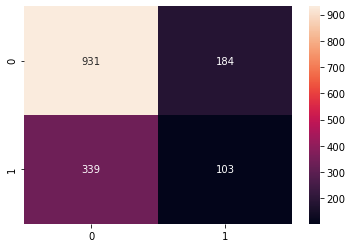

In [ ]:
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

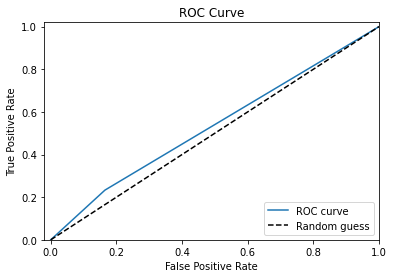

In [ ]:
#Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,Y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# With Feature Selection

# Decision Tree Classifier

In [ ]:
!pip install sklearn-genetic

In [ ]:
# Here we are doinf the Feature Selection using the Genetic Algorithm i.e Using the Genetic Selection CV
from genetic_selection import GeneticSelectionCV

In [ ]:
estimator = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2)
model_fs = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)


In [ ]:
model_fs = model_fs.fit(X_train, y_train)
print('Features:', X.columns[model_fs.support_])

Features: Index(['MonthlyMinutes', 'UniqueSubs'], dtype='object')


In [ ]:
Y_pred = model_fs.predict(X_test)
acc_decision_tree_fs = round(model_fs.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree_fs)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 71.55
              precision    recall  f1-score   support

           0   0.717335  0.994619  0.833521      1115
           1   0.454545  0.011312  0.022075       442

    accuracy                       0.715478      1557
   macro avg   0.585940  0.502966  0.427798      1557
weighted avg   0.642735  0.715478  0.603168      1557



C:\Users\92303\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
C:\Users\92303\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


Predicted,0,1,All
Actual,,,
0,1109,6,1115
1,437,5,442
All,1546,11,1557


<AxesSubplot:>

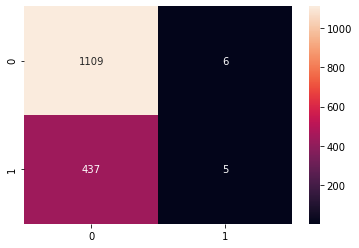

In [ ]:
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

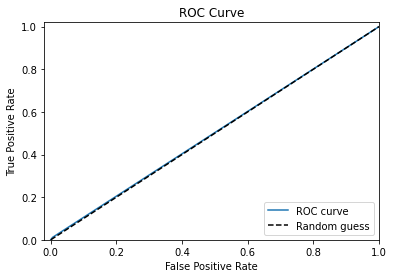

In [ ]:
# Plotting the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,Y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# Naive Bayes Classifier

In [ ]:
# Implementing Feature Selection using Genetic Algorithms i.e Using Genetic Selection, on Naive Bayes Classifier
estimator = GaussianNB(var_smoothing =  0.12)
model_fs_NB = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)


In [ ]:
model_fs_NB = model_fs_NB.fit(X_train, y_train)
print('Features:', X.columns[model_fs.support_])

Features: Index(['MonthlyMinutes', 'UniqueSubs'], dtype='object')


In [ ]:
Y_pred = model_fs_NB.predict(X_test)
acc_NB_fs = round(model_fs_NB.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_NB_fs)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 71.48
              precision    recall  f1-score   support

           0   0.718567  0.989238  0.832453      1115
           1   0.454545  0.022624  0.043103       442

    accuracy                       0.714836      1557
   macro avg   0.586556  0.505931  0.437778      1557
weighted avg   0.643617  0.714836  0.608373      1557



C:\Users\92303\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(
C:\Users\92303\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GeneticSelectionCV was fitted without feature names
  warnings.warn(


Predicted,0,1,All
Actual,,,
0,1103,12,1115
1,432,10,442
All,1535,22,1557


<AxesSubplot:>

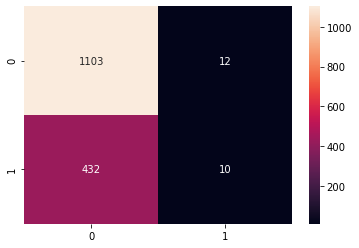

In [ ]:
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

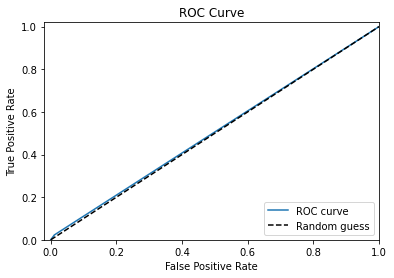

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,Y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

# Support Vector Machine 

In [ ]:
# Selecting the Optimal Number of Features using Genetic Algorithm for Support Vector Machine Classifier
estimator = SVC()


In [ ]:
model_fs_SVM = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=5,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)

In [ ]:
model_fs_SVM = model_fs_SVM.fit(X_train, y_train)

In [ ]:
Y_pred = model_fs_SVM.predict(X_test)
acc_SVM_fs = round(model_fs_SVM.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_SVM_fs)
print(sk_report)

In [ ]:
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,Y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")